# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

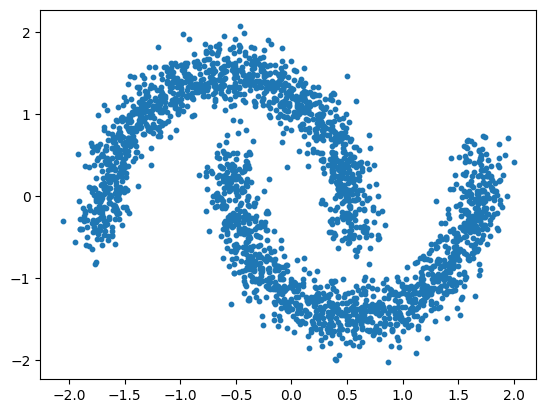

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [12]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 3,
    'batch_size': 256,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=25, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 394 | Loss: 1.8186:  79%|███████▊  | 393/500 [20:16<05:31,  3.10s/it]


Early stopping at epoch 394
Henze-Zirkler p-value:	5.205131557942183e-07


5.205131557942183e-07

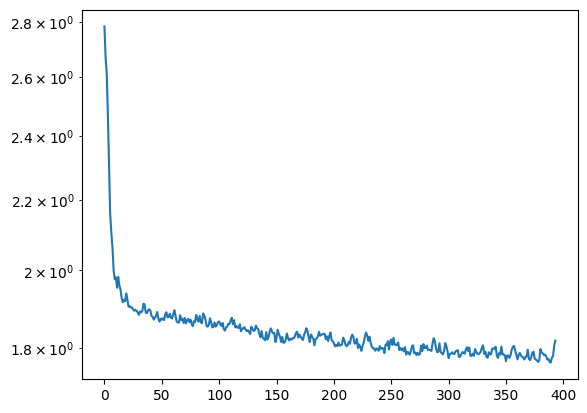

In [13]:
plt.plot(LAM.loss_history)
plt.yscale('log')

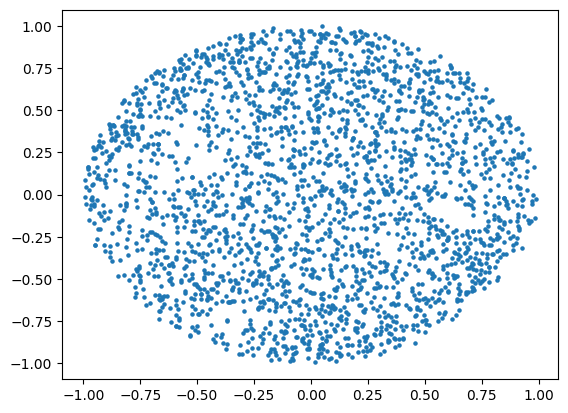

In [14]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [15]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0, 1926,  232, 1055,  438,  134, 2391, 2328,  344, 1346, 1573,
         2468, 1490, 2488,  504, 1854, 2055, 1742, 2182, 2019, 1401, 1706,
          151, 1301, 1891], dtype=int64)],
 [array([0.        , 0.00304187, 0.03804076, 0.03971153, 0.04515406,
         0.04595583, 0.04628319, 0.04765702, 0.05253671, 0.05348599,
         0.05420757, 0.05456945, 0.0546256 , 0.05478357, 0.05484026,
         0.05572655, 0.05631941, 0.05651701, 0.05663581, 0.05688562,
         0.05691311, 0.05722072, 0.05750506, 0.05755198, 0.05759332])])

In [16]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0, 1926,  232, 1055,  438], dtype=int64),
  array([   2,  997, 1223, 1632, 1080], dtype=int64),
  array([   5,  268, 1430, 2070, 2267], dtype=int64)],
 [array([0.        , 0.00304187, 0.03804076, 0.03971153, 0.04515406]),
  array([0.        , 0.00057041, 0.00065175, 0.0008073 , 0.00158833]),
  array([0.        , 0.00104482, 0.00174989, 0.00181573, 0.00198105])])

In [17]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.0983089623041451


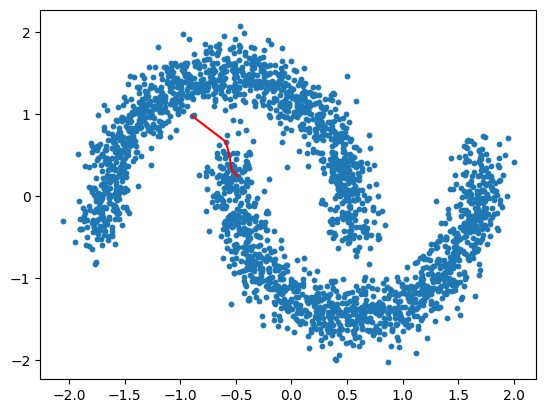

In [18]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

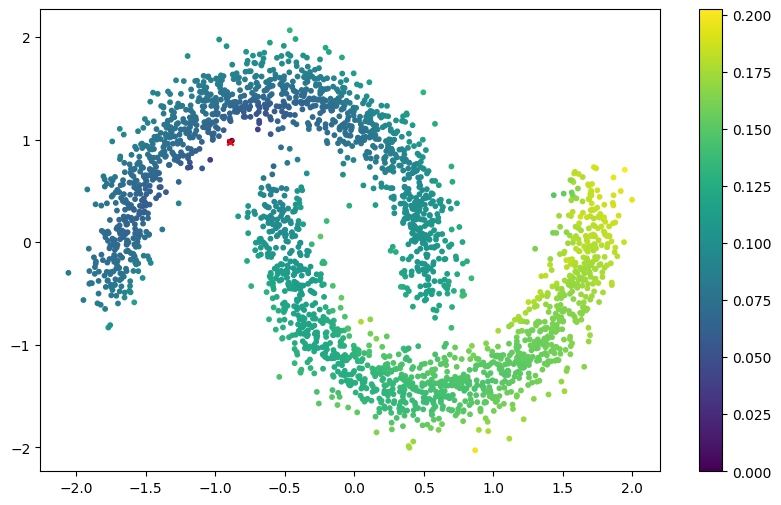

In [19]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()
